# Focus: Relationships between variables (scatter, bar, correlation, bubble, and multi-feature views)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [59]:
data = {
    "Salary": [250000 , 10000 , 35666, 450000 , 1000000 , 300000 , 600000 , 500000 , 60000 , 70000 , 300000],
    "Age" :[20 , 25 , 32 , 30 , 25 , 57 ,46  , 35 , 47 , 31 , 29] ,
    "Department" : ['HR' , 'IT' , 'HR' , 'IT' , 'COMPUTER' , 'MEDICAL' , 'COMPUTER' , 'MEDICAL' , 'IT' , 'COMPUTER' , 'MEDICAL']

}

df = pd.DataFrame(data)
df

,Salary,Age,Department
0,250000,20,HR
1,10000,25,IT
2,35666,32,HR
3,450000,30,IT
4,1000000,25,COMPUTER
5,300000,57,MEDICAL
6,600000,46,COMPUTER
7,500000,35,MEDICAL
8,60000,47,IT
9,70000,31,COMPUTER


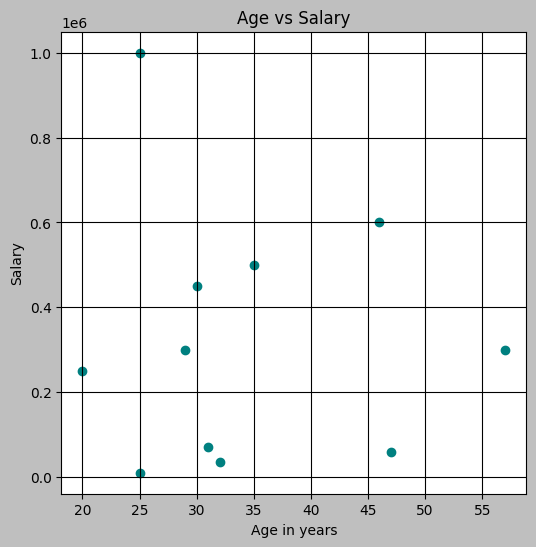

In [60]:
plt.figure(figsize = (6 , 6))
plt.style.use('grayscale')
plt.scatter(df['Age'] , df['Salary'] , color  = 'teal')
plt.title("Age vs Salary")
plt.xlabel("Age in years")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

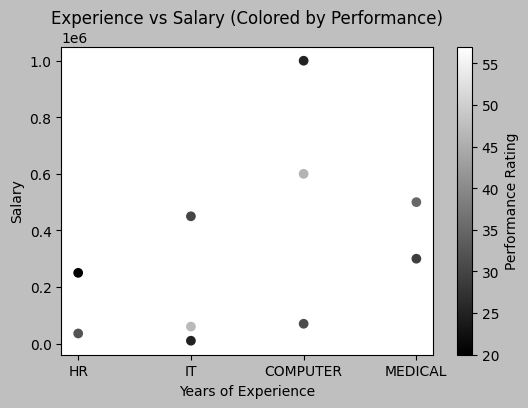

In [61]:
plt.figure(figsize=(6, 4))
plt.scatter(
    df["Department"],
    df["Salary"],
    c=df["Age"]
)
plt.title("Experience vs Salary (Colored by Performance)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.colorbar(label="Performance Rating")
plt.show()


In [62]:
sort_age = df.sort_values('Salary')

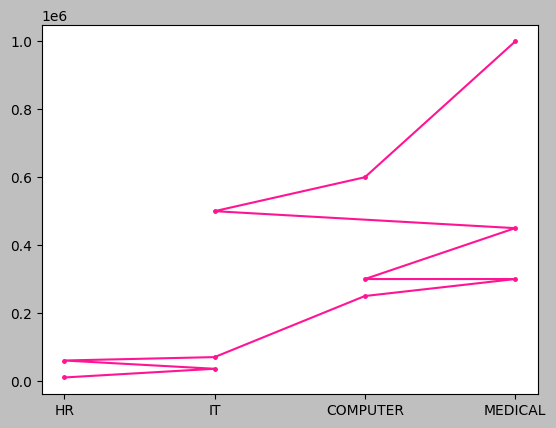

In [63]:
plt.plot(df['Department'] , sort_age['Salary'] , marker = '.' , markersize = '5' , color = 'deeppink')
plt.show()

# Bar Chart (Grouped Bivariate View)

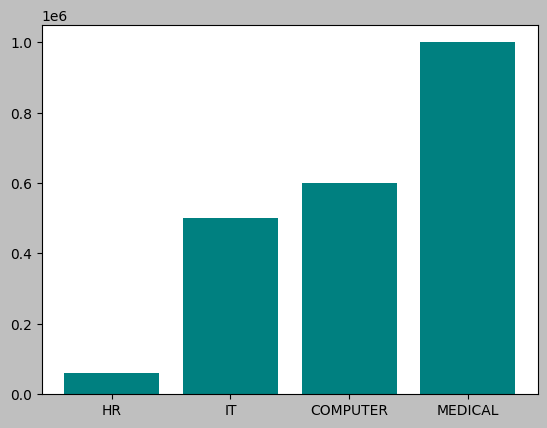

In [64]:
plt.bar(df["Department"], sort_age["Salary"], color="teal")
plt.show()


# Bivariate Analysis : Arranging `**Numerical columns**` with `**Categorical columns**`

# `Distribution of salary by department`

In [65]:
hr_sal = df[df['Department'] == 'HR']['Salary']
hr_sal

0    250000
2     35666
Name: Salary, dtype: int64

In [66]:
it_sal = df[df['Department'] == 'IT']['Salary']
it_sal

1     10000
3    450000
8     60000
Name: Salary, dtype: int64

In [67]:
medical  = df[df['Department'] == 'MEDICAL']['Salary']
medical

5     300000
7     500000
10    300000
Name: Salary, dtype: int64

In [68]:
comp  = df[df['Department'] == 'COMPUTER']['Salary']
comp

4    1000000
6     600000
9      70000
Name: Salary, dtype: int64

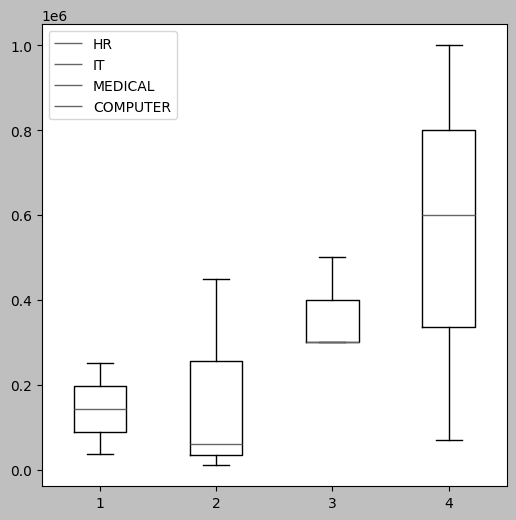

In [69]:
plt.figure(figsize = (6 , 6))
plt.boxplot([hr_sal , it_sal , medical , comp] , label = ['HR' , 'IT' , 'MEDICAL' , 'COMPUTER'])
plt.legend()
plt.show()

# Displaying salary by grouping by the department

In [70]:
salary_by_dept = df.groupby("Department")['Salary'].sum()
salary_by_dept

Department
COMPUTER    1670000
HR           285666
IT           520000
MEDICAL     1100000
Name: Salary, dtype: int64

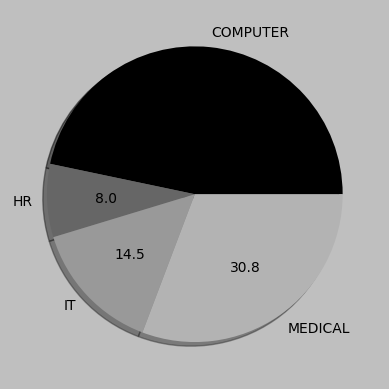

In [91]:
plt.pie(salary_by_dept , labels = salary_by_dept.index , autopct='%1.1f' , shadow = True) # here the index is the department hence .index
plt.show()

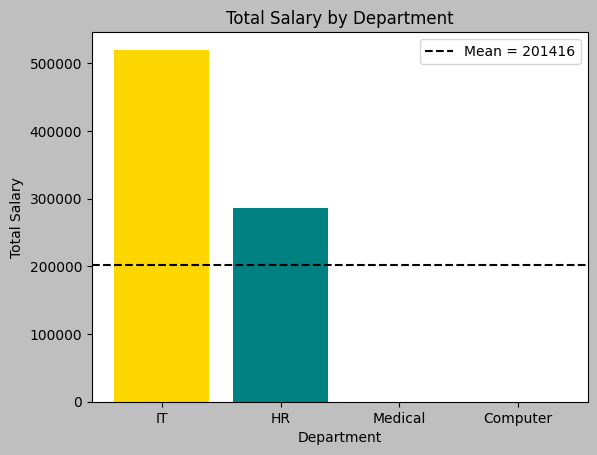

In [76]:
it_sal = df[df["Department"] == "IT"]["Salary"].sum()
hr_sal = df[df["Department"] == "HR"]["Salary"].sum()
medical = df[df["Department"] == "Medical"]["Salary"].sum()
comp = df[df["Department"] == "Computer"]["Salary"].sum()

salaries = [it_sal, hr_sal, medical, comp]
labels = ["IT", "HR", "Medical", "Computer"]

# Mean of department salaries
mean_salary = sum(salaries) / len(salaries)

# Plot
plt.bar(labels, salaries, color=["gold", "teal", "deeppink", "royalblue"])

plt.title("Total Salary by Department")
plt.xlabel("Department")
plt.ylabel("Total Salary")

# Mean line (horizontal = correct for vertical bars)
plt.axhline(mean_salary, linestyle="--", label=f"Mean = {int(mean_salary)}")
plt.legend()

plt.show()


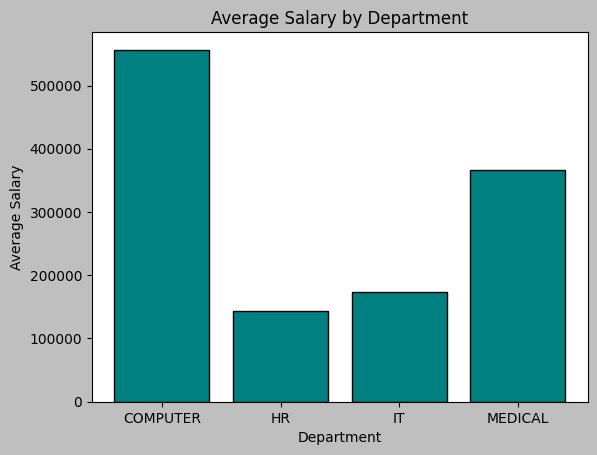

In [84]:
dept_mean = df.groupby("Department")["Salary"].mean()

plt.bar(dept_mean.index, dept_mean.values, color="teal" , edgecolor = 'black')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


># Multivariate Analysis

In [86]:
df

,Salary,Age,Department
0,250000,20,HR
1,10000,25,IT
2,35666,32,HR
3,450000,30,IT
4,1000000,25,COMPUTER
5,300000,57,MEDICAL
6,600000,46,COMPUTER
7,500000,35,MEDICAL
8,60000,47,IT
9,70000,31,COMPUTER


In [85]:
df.head()

,Salary,Age,Department
0,250000,20,HR
1,10000,25,IT
2,35666,32,HR
3,450000,30,IT
4,1000000,25,COMPUTER


In [89]:
df['Experience'] = [ 1, 2 , 3 ,4 , 5 , 1.2 , 3.5 , 6 , 1 , 2 , 3]

In [90]:
df

,Salary,Age,Department,Experience
0,250000,20,HR,1.0
1,10000,25,IT,2.0
2,35666,32,HR,3.0
3,450000,30,IT,4.0
4,1000000,25,COMPUTER,5.0
5,300000,57,MEDICAL,1.2
6,600000,46,COMPUTER,3.5
7,500000,35,MEDICAL,6.0
8,60000,47,IT,1.0
9,70000,31,COMPUTER,2.0


# Bubble Plot

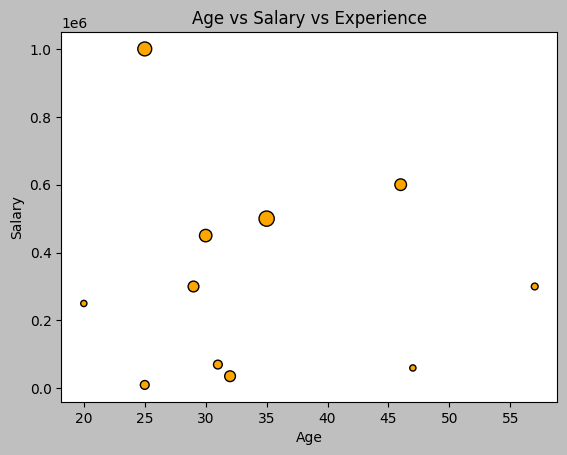

In [ ]:
# Here we have 2 numerical columns 
plt.scatter(df['Age'] , df["Salary"] , s = df['Experience']*20 , color = 'orange' , edgecolor = "black")
plt.title("Age vs Salary vs Experience")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

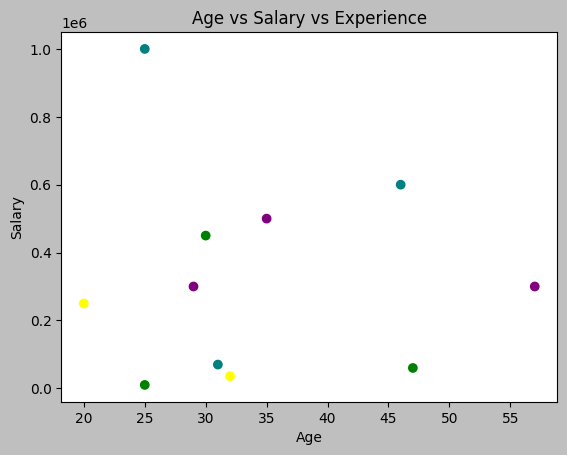

In [ ]:
# What if we have one numerical column and one categorical
plt.scatter(df['Age'] , df['Salary'] , c = df["Department"].map({"HR":"yellow" , "IT":"green" , "MEDICAL":"purple" , "COMPUTER":"teal"}) , label = df['Department'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary vs Experience")
plt.show()

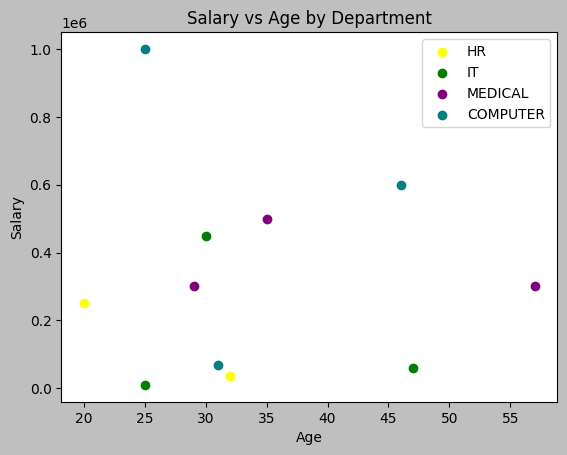

In [101]:
colors = {"HR": "yellow", "IT": "green", "MEDICAL": "purple", "COMPUTER": "teal"}

for dept, col in colors.items():
    df_dept = df[df["Department"] == dept]
    plt.scatter(df_dept["Age"], df_dept["Salary"], c=col, label=dept)

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary vs Age by Department")
plt.legend()
plt.show()
